* Block groups are the smallest geographic unit which typically has a population of 600 to 3,000 people. We can call them districts for short
* target is to predict the median house price in any neighbourhood

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
for dirname, _, filenames in os.walk('./house_prices'):
    for filename in filenames:
        print(filename)

KeggleHousePrices_test.csv
KeggleHousePrices_train.csv


In [4]:
train = pd.read_csv('./house_prices/KeggleHousePrices_train.csv')
test = pd.read_csv('./house_prices/KeggleHousePrices_test.csv')
print(f'Train shape : {train.shape}')
print(f'Test shape : {test.shape}')

Train shape : (1460, 81)
Test shape : (1459, 80)


In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


<ul>
<li><span style="color: #ffff00;">We&rsquo;ll use the describe function to get a description of the&nbsp;<em class="lp">&lsquo;SalesPrice&rsquo;</em>&nbsp;column</span></li>
</ul>

In [7]:
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ul>
<li><span style="color: #ffff00;">Let&rsquo;s plot the distribution of SalesPrice using a histogram. We can clearly observe that the distribution is right-skewed</span></li>
</ul>

<Axes: xlabel='SalePrice', ylabel='Count'>

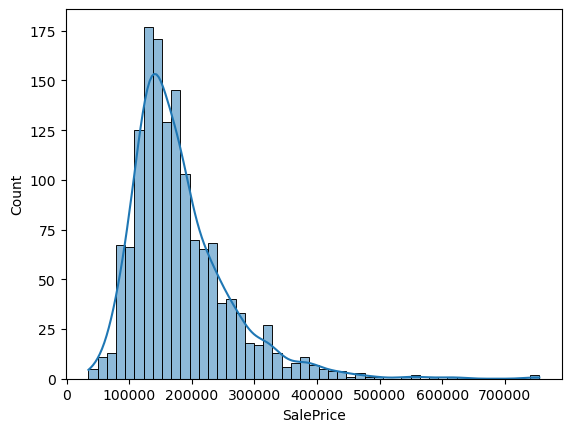

In [8]:
sns.histplot(train['SalePrice'],kde=True)   #kde:If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s)

<ul>
<li>
<h3><span style="color: #99ccff;">We&rsquo;ll use the log transformation to remove the skewness from the distribution</span></h3>
<ul>
<li><span style="color: #00ff00;">In general, for right-skewed data, the log-transformation may make it either right-or left-skewed. If the original data does follow a log-normal distribution, the log-transformed data will follow or approximately follow the normal distribution. However, in general there is no guarantee that the log-transformation will reduce skewness and make the data a better approximation of the normal distribution</span></li>
</ul>
</li>
</ul>

<Axes: xlabel='SalePrice', ylabel='Count'>

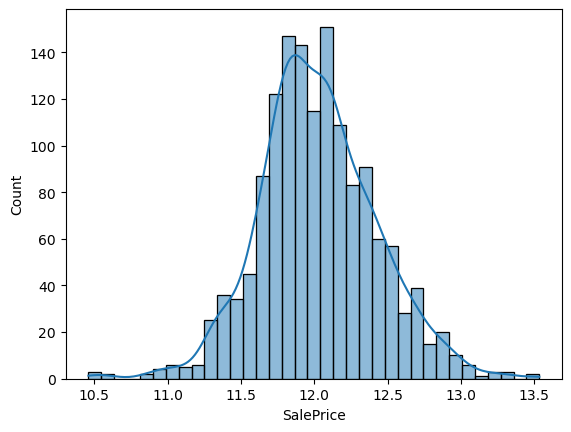

In [9]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'],kde=True)

<ul>
<li><span style="color: #ffff00;">We will plot a heatmap to denote the highly correlated features</span></li>
</ul>

In [10]:
corr = train.corr()
corr    #corr is a dataframe

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11076\14279181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023


<h1><span style="color: #ff9900;">pandas.DataFrame.index:</span></h1>
<ul>
<li><span style="color: #00ccff;">The index (row labels) of the DataFrame</span></li>
</ul>

In [11]:
highly_corr_features = corr.index[abs(corr["SalePrice"])>0.5]   #returnes the index(lables) of rows that have correlation more than 0.5 with salesprice
print(type(highly_corr_features))
highly_corr_features

<class 'pandas.core.indexes.base.Index'>


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

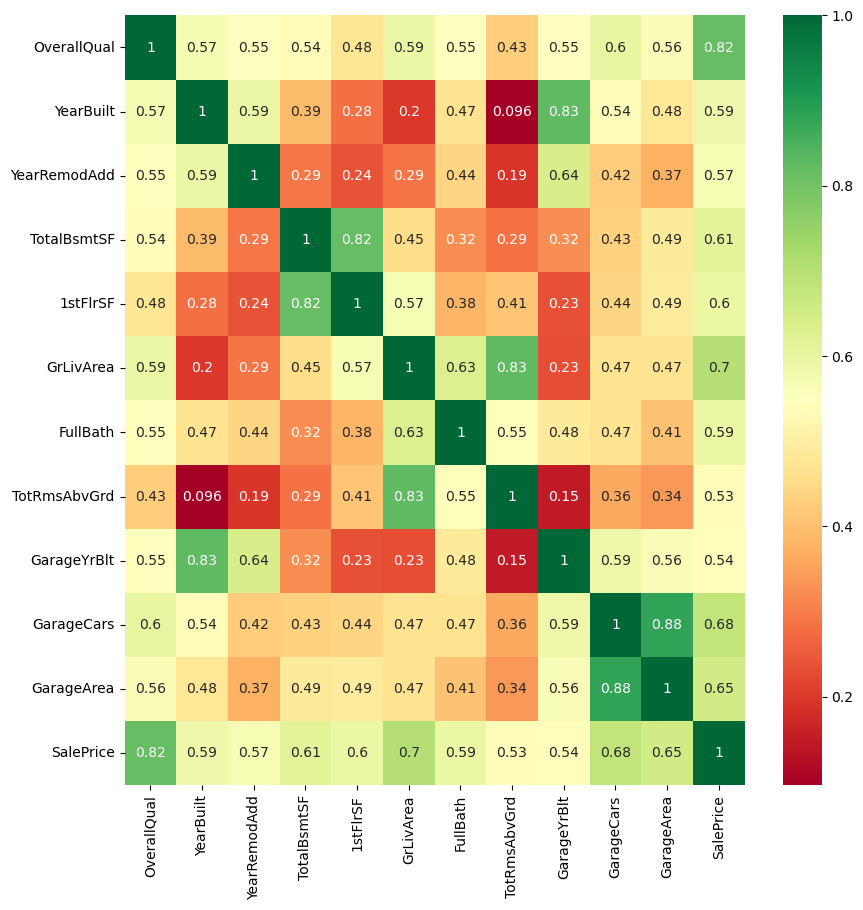

In [12]:

plt.figure(figsize=(10,10))
map = sns.heatmap(train[highly_corr_features].corr(),annot=True,cmap="RdYlGn")

<h3><span style="color: #ffff99;">Let&rsquo;s see the top 10 correlated features with&nbsp;SalesPrice</span></h3>

In [13]:
print(type(corr["SalePrice"].sort_values(ascending=False))) #like count_values it's a series
corr["SalePrice"].sort_values(ascending=False).head(10)

<class 'pandas.core.series.Series'>


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

<ul>
<li>
<h4><span style="color: #ffff99;">Let&rsquo;s plot some features against the SalesPrice to see how they change w.r.t SalesPrice.</span></h4>
</li>
</ul>

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

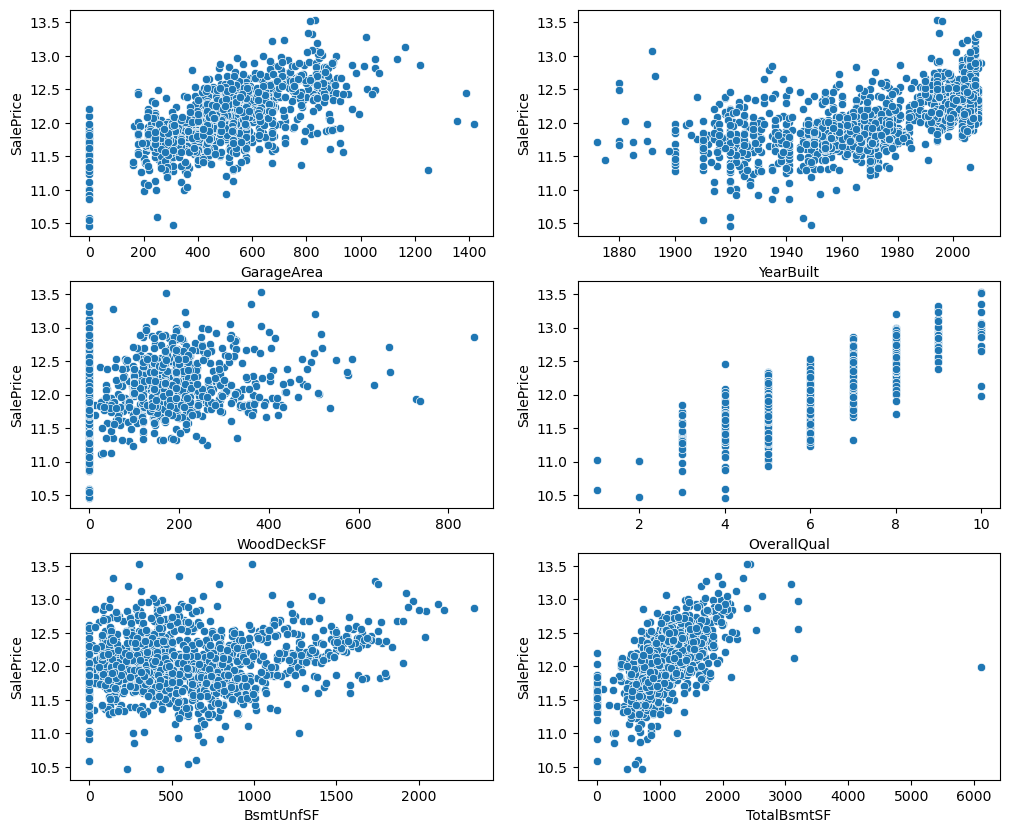

In [14]:
fig = plt.figure(figsize=(12,10))
#GarageArea
plt.subplot(321)
sns.scatterplot(data=train, x='GarageArea', y="SalePrice")
#YearBuilt
plt.subplot(322)
sns.scatterplot(data=train, x='YearBuilt', y="SalePrice")
#WoodDeckSF
plt.subplot(323)
sns.scatterplot(data=train, x='WoodDeckSF', y="SalePrice")
#OverallQual
plt.subplot(324)
sns.scatterplot(data=train, x='OverallQual', y="SalePrice")
#BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=train, x='BsmtUnfSF', y="SalePrice")
#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=train, x='TotalBsmtSF', y="SalePrice")

<h3><span style="color: #ffcc00;">We will concatenate the train and test datasets to make the preprocessing easy. Later, we will divide them again.</span></h3>

In [15]:
data = pd.concat([train,test], axis=0)
y_train = train['SalePrice']
data = data.drop(['Id', 'SalePrice'], axis=1)
print(data.shape)

(2919, 79)


Let’s get information about the concatenated dataframe

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<p><span style="color: #00ff00;">To see the distribution of data types across the columns, we will plot a pie chart.data a better approximation of the normal distribution</span></p>

<class 'pandas.core.series.Series'>
object     43
int64      25
float64    11
dtype: int64


<Axes: >

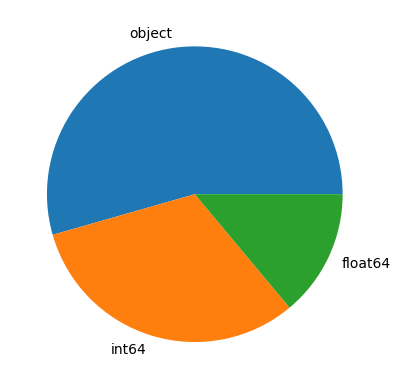

In [17]:
print(type(data.dtypes.value_counts()))
print(data.dtypes.value_counts())
data.dtypes.value_counts().plot.pie()


<ul>
<li><span style="color: #ffff99;">Let&rsquo;s print the number of unique values in each column</span></li>
</ul>

In [18]:
print('UNIQUE VALUES\n')
for col in data.columns:
    print(type(data[col].unique()))
    print(data[col].unique())
    print(f'{col}: {len(data[col].unique())}\n')

UNIQUE VALUES

<class 'numpy.ndarray'>
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
MSSubClass: 16

<class 'numpy.ndarray'>
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
MSZoning: 6

<class 'numpy.ndarray'>
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
LotFrontage: 129

<class 'numpy.ndarray'>
[ 8450  9600 11250 ...  1894 20000 10441]
LotArea: 1951

<class 'numpy.ndarray'>
['P

<ul>
<li><span style="color: #ffff99;">We&rsquo;ll describe each column in&nbsp;<em class="lp">data&nbsp;</em>apart from the ones with the object data type</span></li>
</ul>

In [19]:
data[data.select_dtypes(exclude='object').columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<ul>
<li><span style="color: #ffff99;">Let&rsquo;s plot a heatmap so that we can clearly see the null values present across all the columns</span></li>
</ul>

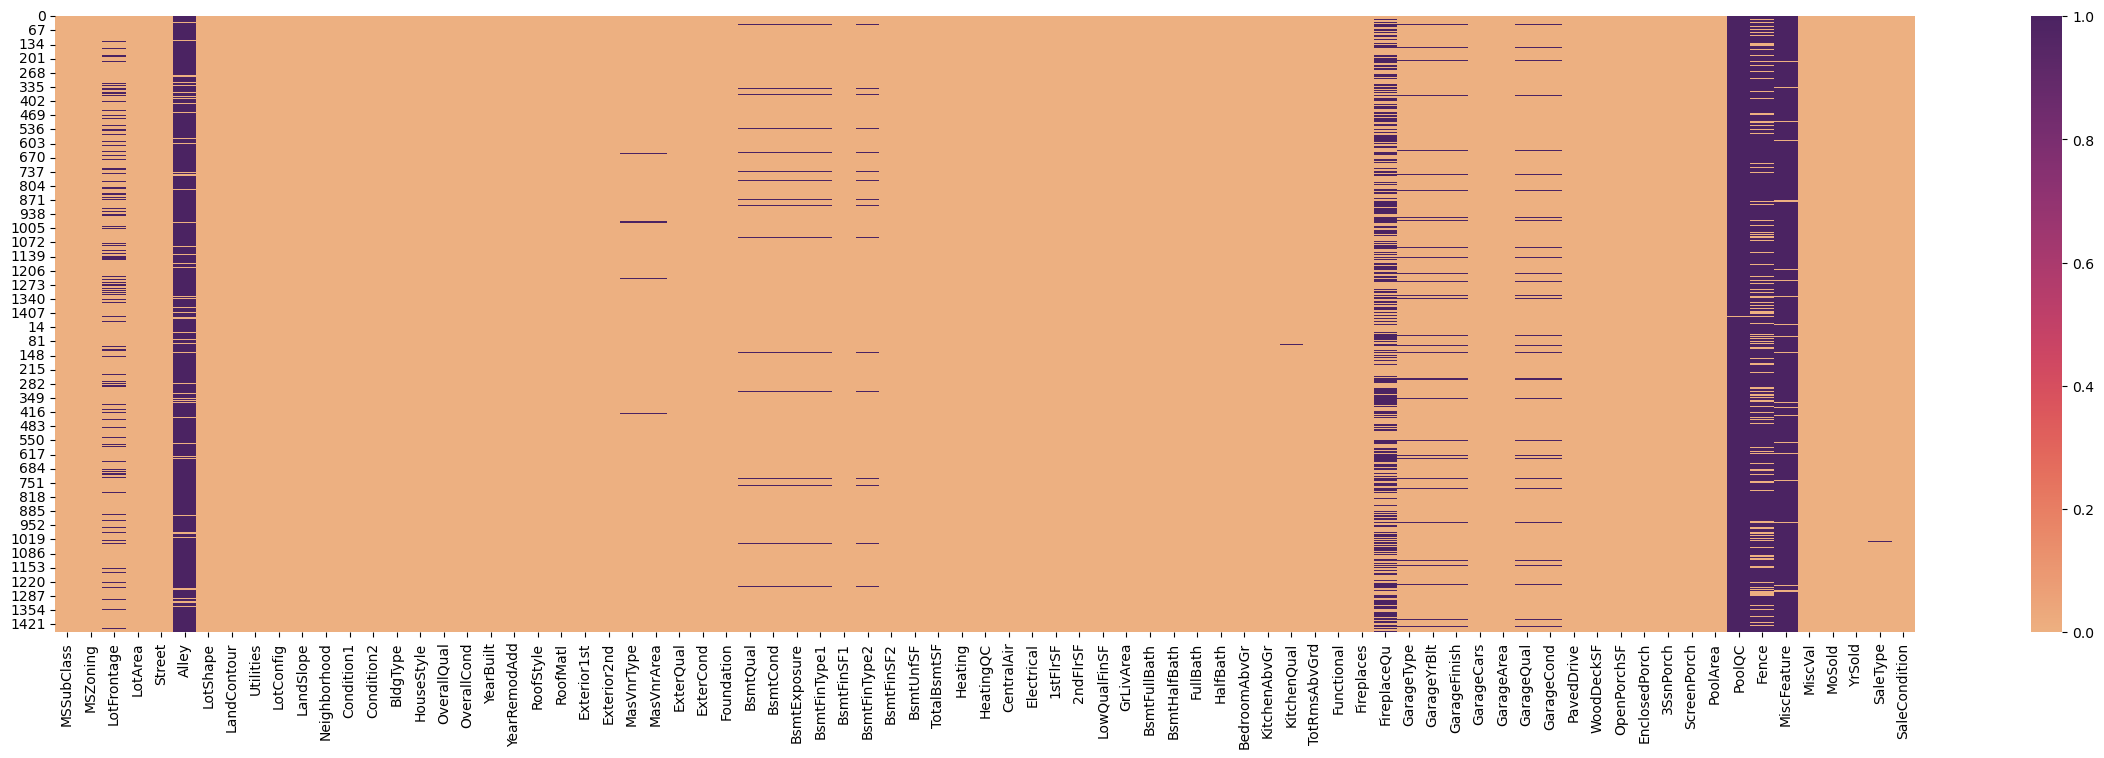

In [20]:
#Visualizing the null values in all columns
plt.figure(figsize=(30,8));
sns.heatmap(data.isnull(), cmap='flare');

<ul>
<li><span style="color: #ffff99;">We&rsquo;ll print the total count and percentage of null values in the columns</span></li>
</ul>

<h1><span style="color: #ffff99;">pandas.isnull</span></h1>
<ul>
<li><span style="color: #ffff99;">Detect missing values for an array-like object.This function takes a scalar or array-like object and indicates whether values are missing (<code class="docutils literal notranslate"><span class="pre">NaN</span></code>&nbsp;in numeric arrays,&nbsp;<code class="docutils literal notranslate"><span class="pre">None</span></code>&nbsp;or&nbsp;<code class="docutils literal notranslate"><span class="pre">NaN</span></code>&nbsp;in object arrays,&nbsp;<code class="docutils literal notranslate"><span class="pre">NaT</span></code>&nbsp;in datetimelike)</span></li>
</ul>

In [22]:
#Columns containing most null values
data.isnull


<bound method DataFrame.isnull of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0        

In [24]:
total = data.isnull().sum()
total

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [25]:
total = data.isnull().sum().sort_values(ascending=False)
total

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
SaleCondition       0
Length: 79, dtype: int64

In [26]:

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))

              Total    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071


<ul>
<li><span style="color: #99ccff;">If we observe the features with missing values of more than 5, we&lsquo;ll note that they are not important and none of them correlates&gt; 0.5. So, we can delete them without losing any significant detail</span></li>
</ul>
* We’ll then see, which remaining columns have null values

In [27]:
#Dropping columns with > 5 null values
data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
#Sorting columns w.r.t null values
total = data.isnull().sum().sort_values(ascending=False)
total.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

<ul>
<li>
<p id="6e7b" class="pw-post-body-paragraph jo jp iq jq b jr js jt ju jv jw jx jy jz ka kb kc kd ke kf kg kh ki kj kk kl ij bj" data-selectable-paragraph=""><span style="color: #ffff99;">We will now fill the missing values in numeric columns with 0&rsquo;s and the missing values in categorical columns with the most frequently occurring value (mode).</span></p>
<p id="a705" class="pw-post-body-paragraph jo jp iq jq b jr js jt ju jv jw jx jy jz ka kb kc kd ke kf kg kh ki kj kk kl ij bj" data-selectable-paragraph=""><span style="color: #ffff99;">We&rsquo;ll also delete the column&nbsp;<em class="lp">&lsquo;Utilities&rsquo;</em>&nbsp;as it contains only one value, i.e &lsquo;AllPub&rsquo;.</span></p>
</li>
</ul>

In [28]:
#Filling the numeric data
numeric_missed = ['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath',
'GarageArea',
'GarageCars']
for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
    


<h1><span style="color: #ffff99;">pandas.DataFrame.fillna</span></h1>
<ul>
<li><span style="color: #99ccff;">Fill NA/NaN values using the specified method</span></li>
</ul>
<h1><span style="color: #ffff99;">pandas.DataFrame.mode</span></h1>
<ul>
<li><span style="color: #99ccff;">The mode of a set of values is the value that appears most often. It can be multiple values</span></li>
</ul>

In [33]:
#Filling the categorical data
categorical_missed = ['Exterior1st',
'Exterior2nd',
'SaleType',
'MSZoning',
'Electrical',
'KitchenQual',
'Functional']
print(type(data['Exterior1st'].mode()))
for feature in categorical_missed:
    print(f'{feature}:',data[feature].mode())
for feature in categorical_missed:
    print(f'{feature}:',data[feature].mode()[0])  #most frequently repeated object   
    


<class 'pandas.core.series.Series'>
Exterior1st: 0    VinylSd
Name: Exterior1st, dtype: object
Exterior2nd: 0    VinylSd
Name: Exterior2nd, dtype: object
SaleType: 0    WD
Name: SaleType, dtype: object
MSZoning: 0    RL
Name: MSZoning, dtype: object
Electrical: 0    SBrkr
Name: Electrical, dtype: object
KitchenQual: 0    TA
Name: KitchenQual, dtype: object
Functional: 0    Typ
Name: Functional, dtype: object
Exterior1st: VinylSd
Exterior2nd: VinylSd
SaleType: WD
MSZoning: RL
Electrical: SBrkr
KitchenQual: TA
Functional: Typ


In [34]:
for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])
#Deleting 'Utilities' column
data.drop(['Utilities'], axis=1, inplace=True)

In [35]:
#Checking for any remaining null values
data.isnull().sum().max()

0

Let’s find the most skewed columns in data

In [36]:
#Top skewed columns
data.dtypes #This returns a Series with the data type of each column.


MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64


In [37]:
data.dtypes[data.dtypes != 'object'].index


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

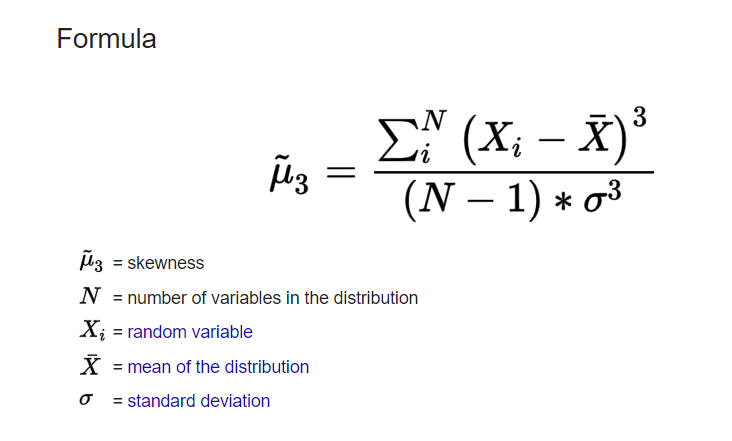
<ul>
<li><span style="color: #99ccff;">The skewness for a normal distribution is zero, and&nbsp;any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right</span></li>
<li><span style="color: #ffff99;">Since a high level of skewness can generate misleading results from statistical tests,&nbsp;the extreme positive skewness is not desirable for a distribution</span></li>
</ul>

In [38]:

numeric_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [40]:

high_skew = skewed_features[abs(skewed_features) > 0.5]
print(type(high_skew))
print(type(skewed_features))
print(high_skew)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


<ul>
<li><span style="color: #ffff99;">Let&rsquo;s apply log transformations to all these skewed columns</span></li>
</ul>

In [41]:
#Transforming skewed columns
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature]) #Return the natural logarithm of one plus the input array, element-wise-->Calculates log(1 + x)

<ul>
<li><span style="color: #ffff99;">Let convert the categorical variables into numeric variables. We&rsquo;ll do this using the get_dummies() method.</span></li>
</ul>

In [42]:
data.head() #before applying get dummies

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,9.042040,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,WD,Normal
1,3.044522,RL,9.169623,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,WD,Normal
2,4.110874,RL,9.328212,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,WD,Normal
3,4.262680,RL,9.164401,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml
4,4.110874,RL,9.565284,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,WD,Normal


In [43]:
#Converting categorical data to numerical
data = pd.get_dummies(data) #seems replaced the categorical columns with their dummied values
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


<ul>
<li><span style="color: #ffff99;">We&rsquo;ll split back the data back into train and test. We will take into use the y_train which we had created in the beginning</span></li>
</ul>

In [44]:
#Dividing data back into train & test
train =data[:len(y_train)]
test = data[len(y_train):]
#Printing thier shapes
print(train.shape, test.shape)

(1460, 218) (1459, 218)


<ul>
<li><span style="color: #ffff99;">We&rsquo;ll further break the train data into x_train, x_test, y_train, and y_test so that we can measure our model&rsquo;s performance</span></li>
</ul>

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)

<h1 id="5555" class="km kn iq be ko kp kq kr ks kt ku kv kw kx ky kz la lb lc ld le lf lg lh li lj bj" data-selectable-paragraph=""><span style="color: #ffff99;">Creating the Model</span></h1>
<ul>
<li><span style="color: #ccffcc;">Let&rsquo;s define our model now. For this, we&rsquo;ll use&nbsp;<em class="lp">RandomForestRegressor</em>&nbsp;from&nbsp;<em class="lp">sklearn.ensemble</em>.</span></li>
</ul>

In [51]:
clf = RandomForestRegressor(n_estimators=300)

In [52]:
clf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300)

<ul>
<li><span style="color: #ffff99;"><em class="lp">Let&rsquo;s calculate our model&rsquo;s score using&nbsp;x_test&nbsp;and&nbsp;y_test.ForestRegressor</em>&nbsp;from&nbsp;<em class="lp">sklearn.ensemble</em>.</span></li>
</ul>

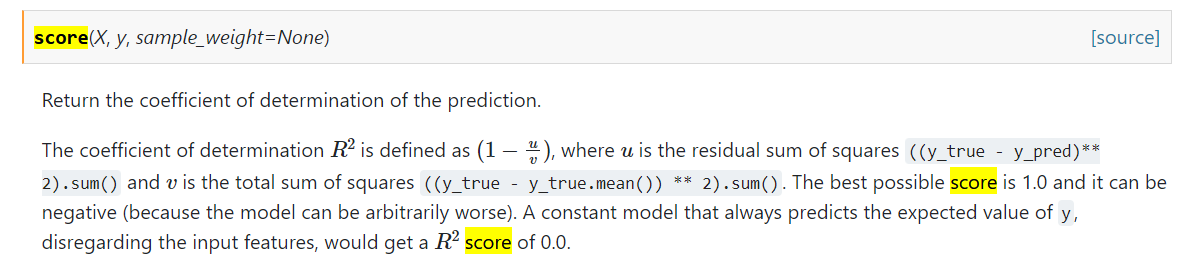

In [53]:
clf.score(x_test,y_test)

0.8876467418053777

In [54]:
#Making an prediction
prediction = clf.predict(test)
print(prediction)

[11.73783768 11.95193269 12.07586453 ... 11.98060705 11.66497081
 12.35512944]


<ul>
<li><span style="color: #ffff99;">Since we had applied normalization on the SalesPrice column previously, we&rsquo;ll use the exponent function to convert the prediction into real-world values</span></li>
</ul>

In [55]:
#Applying reverse of log, i.e exp
np.expm1(prediction)    #numpy.expm1:Calculate exp(x) - 1 for all elements in the array.

array([125220.27820816, 155115.64937994, 175581.54050848, ...,
       159627.90388968, 116420.30220464, 232146.78303106])